<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/gradient_descent_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [553]:
from sklearn.datasets import load_diabetes, make_regression

In [554]:
X, y = load_diabetes(return_X_y = True)

In [639]:
X, y = make_regression(n_features=1, noise=20, random_state=13, n_samples=100, n_targets=1, n_informative=1)

array([-3.43198806e+01, -9.42120961e+00, -1.90881877e+01,  2.04372122e+01,
        2.77559659e+01, -2.90750046e+00, -1.41987828e+01,  5.40025891e+00,
       -2.64264302e+01, -3.49067872e+01,  3.73362043e+01,  1.28532816e+01,
        2.50289888e+01, -1.89608736e+01, -2.34655852e+01,  3.77839324e+01,
        6.69670792e+00, -5.57201352e+00, -4.92158778e+01,  1.59474399e+01,
       -4.29667324e+01,  6.09015466e+00, -2.53194769e+01,  6.28216706e+01,
        1.24870400e+01, -3.27136530e+01, -1.88255476e+01, -2.93912926e+01,
       -2.86886731e+01,  4.38924069e+00,  4.63542396e+01,  2.43919519e+01,
        3.79848517e+01, -3.45767718e+01, -6.18736296e+01, -4.64421597e+01,
       -6.88808416e+00,  3.96988084e+01, -3.52373298e+01,  8.36850884e+00,
       -3.96814412e+01,  8.27318308e+00, -4.40722161e+00, -3.01350607e+00,
        5.78213629e+01,  2.46525603e+01,  1.81131707e+01, -5.22849035e+01,
        3.59187182e+01,  1.58411788e+01,  2.40080546e+01, -2.51245994e+01,
       -4.39284313e+01,  

Text(0, 0.5, 'Target')

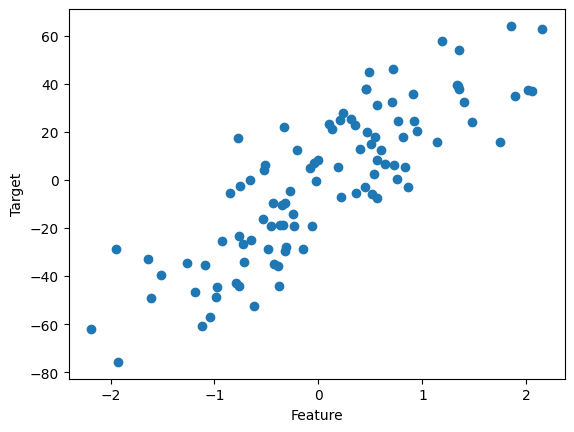

In [556]:
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")

### Using Sklearn Linear Regression (OLS)

In [557]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [558]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [559]:
lr.fit(X_train, y_train)

LinearRegression()

In [560]:
lr.coef_

array([26.92218678])

In [561]:
lr.intercept_

-1.627628110225714

In [562]:
y_pred = lr.predict(X_test)

In [563]:
y_pred

array([ 12.21922939, -10.16912184, -35.59281901,   1.09877597,
       -11.97806971,   8.0517675 ,   4.22664608, -19.3294308 ,
        -5.53703473, -53.43020819,  14.69498835,  13.50968656,
        18.00310088, -11.74821552, -19.15549224,  10.58107316,
        18.99237221,  30.42876163,  34.72556212,  52.62652334])

In [564]:
from sklearn.metrics import r2_score

In [565]:
r2_score(y_test, y_pred)

0.7096230857170095

In [566]:
y_pred = lr.predict(X_train)

Text(0, 0.5, 'Target')

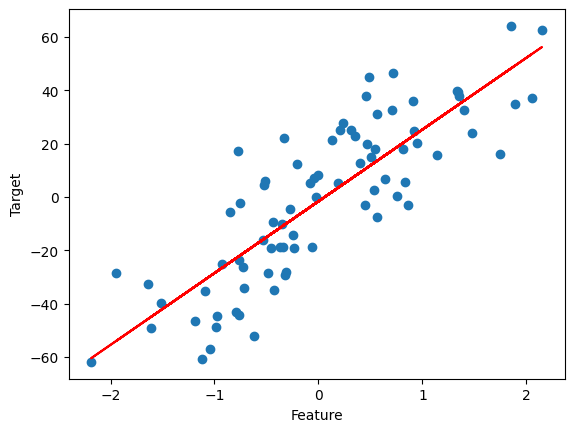

In [567]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")

### Applying Gradient Descent

In [568]:
m = 26.92

In [569]:
class GradientDescentRegression:
  def __init__(self, learning_rate=0.01, iterations=5):
    self.m = m
    self.b = 0
    self.coef_ = self.m
    self.intercept_ = self.b
    self.learning_rate = learning_rate
    self.iterations = iterations

  def fit(self, X_train, y_train):
    total = X_train.shape[0]
    epochs = self.iterations
    self.gradient_values = []
    self.loss_values = []

    for i in range(epochs):
      loss_slope = (-2*np.sum(y_train - (self.m * X_train) - self.b))/total
      loss = np.sum(np.square((y_train - self.m*X_train - self.b)))/total
      self.loss_values.append(loss)
      self.gradient_values.append(loss_slope)
      self.b = self.b - self.learning_rate*loss_slope
    self.coef_ = self.m
    self.intercept_ = self.b
    return self

  def predict(self, X_test):
    return (self.coef_ * X_test) + self.intercept_


In [570]:
lr = GradientDescentRegression(0.001, 20)

In [571]:
lr.fit(X_train, y_train)

In [572]:
lr.coef_

26.92

In [573]:
lr.intercept_

-1.5777669161745902

In [574]:
y_pred = lr.predict(X_test)

In [575]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7093318910105599

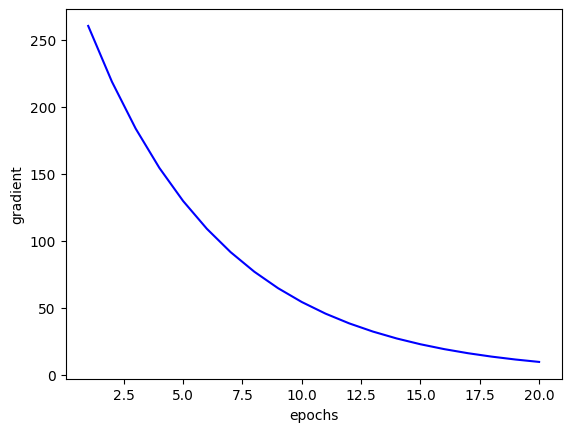

In [576]:
epochs = list(range(1, len(lr.gradient_values) + 1))
plt.plot(epochs, lr.gradient_values, color='blue')
plt.xlabel('epochs')
plt.ylabel('gradient')
plt.show()

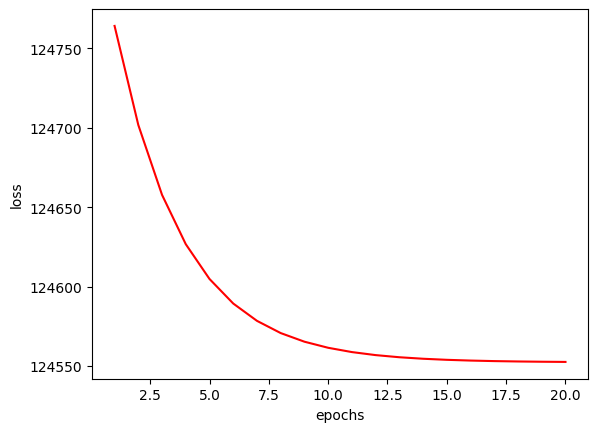

In [577]:
epochs = list(range(1, len(lr.gradient_values) + 1))
plt.plot(epochs, lr.loss_values, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

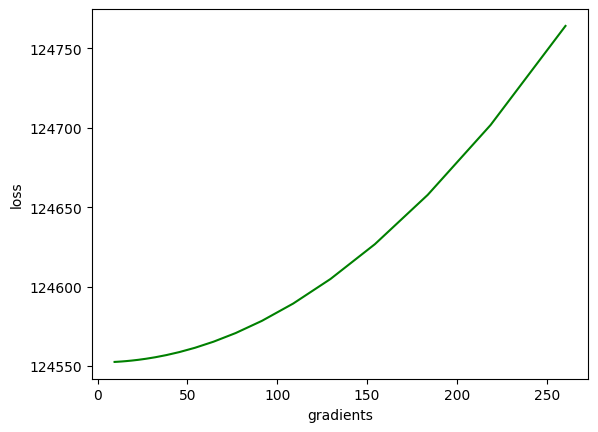

In [578]:
plt.plot(lr.gradient_values, lr.loss_values, color='green')
plt.xlabel('gradients')
plt.ylabel('loss')
plt.show()

In [628]:
class GDRegressor:
  def __init__(self, learning_rate=0.01, iterations=5):
    self.m = -150
    self.b = 120
    self.coef_ = self.m
    self.intercept_ = self.b
    self.learning_rate = learning_rate
    self.iterations = iterations

  def fit(self, X_train, y_train):
    epochs = self.iterations
    self.gradient_values_b = []
    self.gradient_values_m = []
    self.loss_values = []

    for i in range(epochs):
      loss_slope_b = (-2*np.sum(y_train - (self.m * X_train) - self.b))
      print('loss_b: ', loss_slope_b, ' b:', self.b)
      loss_slope_m = (-2*np.sum((y_train - (self.m * X_train) - self.b)*X_train))
      loss = np.sum(np.square((y_train - self.m*X_train - self.b)))
      self.loss_values.append(loss)
      self.gradient_values_b.append(loss_slope_b)
      self.gradient_values_m.append(loss_slope_m)
      self.b = self.b - self.learning_rate*loss_slope_b
      self.m = self.m - self.learning_rate*loss_slope_m
    self.coef_ = self.m
    self.intercept_ = self.b
    return self

  def predict(self, X_test):
    return (self.coef_ * X_test) + self.intercept_


In [629]:
lr = GDRegressor(0.00005, 20)

In [630]:
lr.fit(X_train, y_train)

loss_b:  1480629.4156556334  b: 120
loss_b:  568533.9067229633  b: 45.96852921721832
loss_b:  220736.750425235  b: 17.54183388107015
loss_b:  86686.29301257046  b: 6.5049963598084
loss_b:  34436.80577050803  b: 2.1706817091798767
loss_b:  13836.21999594508  b: 0.4488414206544753
loss_b:  5620.212941883006  b: -0.24296957914277872
loss_b:  2306.512970859787  b: -0.5239802262369291
loss_b:  955.6178341324321  b: -0.6393058747799184
loss_b:  399.3466007042435  b: -0.68708676648654
loss_b:  168.1682812228949  b: -0.7070540965217522
loss_b:  71.29468568299833  b: -0.715462510582897
loss_b:  30.40156669655417  b: -0.7190272448670469
loss_b:  13.028514298254493  b: -0.7205473232018746
loss_b:  5.606901152044685  b: -0.7211987489167874
loss_b:  2.421511926555837  b: -0.7214790939743896
loss_b:  1.0488915191951378  b: -0.7216001695707174
loss_b:  0.4554445425002882  b: -0.7216526141466771
loss_b:  0.19815970886219247  b: -0.7216753863738021
loss_b:  0.08636022959382217  b: -0.7216852943592452


In [631]:
lr.coef_

-1.1993842484154317e-05

In [632]:
lr.intercept_

-0.7216896123707249

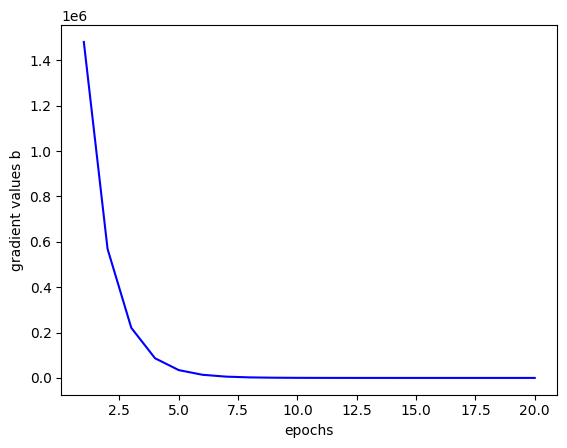

In [633]:
epochs = list(range(1, len(lr.gradient_values_b) + 1))
plt.plot(epochs, lr.gradient_values_b, color='blue')
plt.xlabel('epochs')
plt.ylabel('gradient values b')
plt.show()

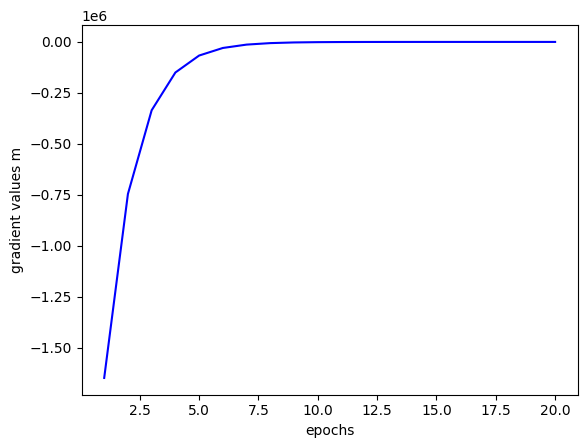

In [634]:
epochs = list(range(1, len(lr.gradient_values_m) + 1))
plt.plot(epochs, lr.gradient_values_m, color='blue')
plt.xlabel('epochs')
plt.ylabel('gradient values m')
plt.show()

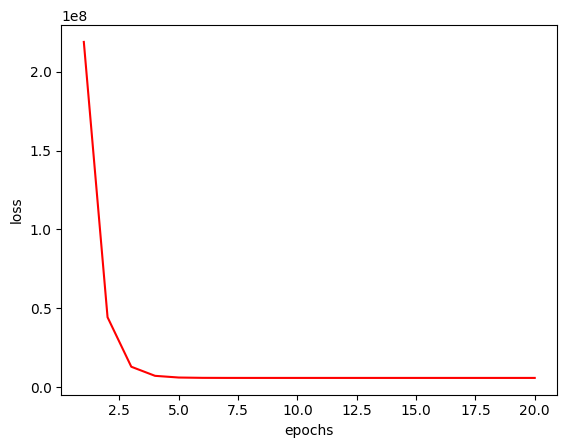

In [635]:
plt.plot(epochs, lr.loss_values, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [636]:
y_pred = lr.predict(X_test)

In [637]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-6.182805069210318e-05